# Fingerprint bit coverage and variability

Get coverage and variability of fingerprint bit positions across all fingerprints in our dataset.

- Investigate missing bits across fingerprints
- Investigate bit variability across fingerprints (standard deviation)
- Get top X bit positions with no/high standard deviation

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from kissim.encoding import FingerprintGenerator, FingerprintNormalized

In [3]:
plt.style.use("seaborn")

In [4]:
HERE = Path(_dh[-1])
RESULTS = HERE / "../../results/"

## Load fingerprints

Let's load our pre-calculated fingerprint saved in a _json_ file as `FingerprintGenerator` object.

In [5]:
fingerprint_generator = FingerprintGenerator.from_json(
    RESULTS / "fingerprints_clean.json", normalize=True
)

In [6]:
n_fingerprints = len(fingerprint_generator.data)
print(f"Number of fingerprints: {n_fingerprints}")

Number of fingerprints: 4916


## Missing bits across fingerprints

In [7]:
def nan_bit_ratio(fingerprint_generator, feature_group):

    if feature_group == "physicochemical":
        features = fingerprint_generator.physicochemical_exploded()
        features = features.drop(["sco.vertex_angle", "exposure.ratio"], axis=1)
    elif feature_group == "distances":
        features = fingerprint_generator.distances_exploded()
    elif feature_group == "moments":
        features = fingerprint_generator.moments_exploded()
    else:
        raise KeyError("Feature group unknown.")

    features = features.unstack()
    features_nan = features.isnull().sum(axis=0) / len(features)
    features_nan = features_nan.unstack(0)

    return features_nan

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

### Missing physicochemical bits

In [8]:
feature_group = "physicochemical"
features_nan = nan_bit_ratio(fingerprint_generator, feature_group)
features_nan

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
residue_ix,,,,,,,,
1,0.005289,0.005289,0.005289,0.005289,0.005289,0.005289,0.073027,0.005289
2,0.004679,0.004679,0.004679,0.004679,0.004679,0.004679,0.030309,0.004679
3,0.005085,0.005085,0.005085,0.005085,0.005085,0.005085,0.010171,0.005289
4,0.016477,0.016477,0.016477,0.016477,0.016477,0.016477,0.941009,0.016680
5,0.044548,0.044548,0.044548,0.044548,0.044548,0.044548,0.133442,0.044752
...,...,...,...,...,...,...,...,...
81,0.001627,0.001627,0.001627,0.001627,0.001627,0.001627,0.008544,0.002034
82,0.010781,0.010781,0.010781,0.010781,0.010781,0.010781,0.014646,0.010781
83,0.035801,0.035801,0.035801,0.035801,0.035801,0.035801,0.982913,0.036412


In [9]:
features_nan.describe()

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.015632,0.015632,0.015632,0.015632,0.015632,0.015632,0.098758,0.015833
std,0.041550,0.041550,0.041550,0.041550,0.041550,0.041550,0.212041,0.041670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000407,0.000000
25%,0.000610,0.000610,0.000610,0.000610,0.000610,0.000610,0.005696,0.000814
50%,0.001831,0.001831,0.001831,0.001831,0.001831,0.001831,0.022783,0.002034
75%,0.008137,0.008137,0.008137,0.008137,0.008137,0.008137,0.069569,0.008340
max,0.321400,0.321400,0.321400,0.321400,0.321400,0.321400,0.982913,0.321806


#### Heatmap (for an overview)

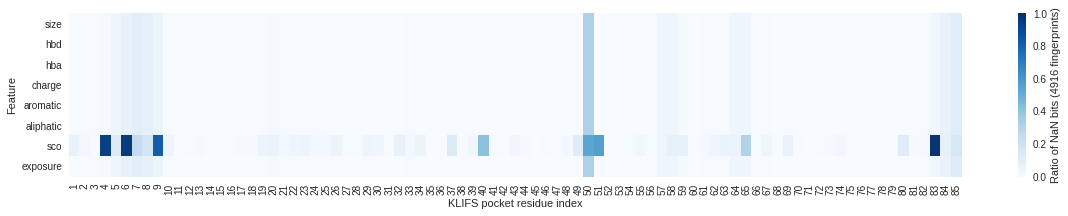

In [10]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_nan.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Ratio of NaN bits ({n_fingerprints} fingerprints)"},
    vmin=0,
    vmax=1,
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

#### Barplot (for concrete values)

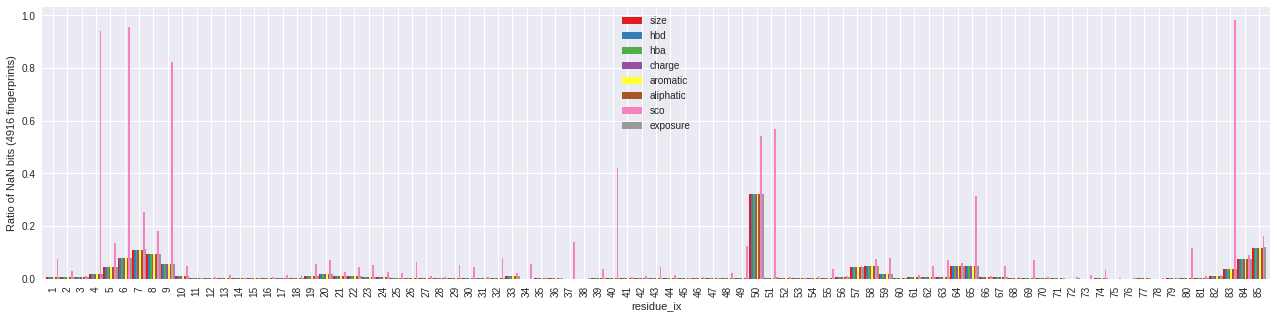

In [11]:
ax = features_nan.plot(kind="bar", figsize=(22, 5), width=1, colormap="Set1")
ax.set_ylabel(f"Ratio of NaN bits ({n_fingerprints} fingerprints)");

__Observations__

- _Side chain orientation_: Gly-rich positions (e.g. 4, 6, 9, 83) have high ratios of missing side orientation values because Gly has no side chain.
- _All feature types_: Higher ratios of missing bits for pocket positions with high ratio of missing residues (e.g. 50, 4-9, 83-58). Check out pattern resemblance with plot on "Missing residues in the kinase binding site" in [this notebook](https://github.com/volkamerlab/kissim_app/blob/master/notebooks/dataset/explore_dataset.ipynb).

### Missing distance bits

In [12]:
feature_group = "distances"
features_nan = nan_bit_ratio(fingerprint_generator, feature_group)
features_nan

,hinge_region,dfg_region,front_pocket,center
residue_ix,,,,
1,0.006713,0.017087,0.005696,0.005289
2,0.006103,0.016680,0.005085,0.004679
3,0.006509,0.017087,0.005492,0.005085
4,0.018308,0.028885,0.017290,0.016884
5,0.046176,0.055940,0.045159,0.044752
...,...,...,...,...
81,0.002441,0.012815,0.003458,0.001627
82,0.011595,0.021969,0.012612,0.010781
83,0.037225,0.047396,0.038242,0.036412


In [13]:
features_nan.describe()

,hinge_region,dfg_region,front_pocket,center
count,85.000000,85.000000,85.000000,85.000000
mean,0.017221,0.027303,0.017180,0.015723
std,0.041399,0.041170,0.041440,0.041565
min,0.001831,0.012408,0.001831,0.000000
25%,0.002034,0.012815,0.002034,0.000610
50%,0.003662,0.013832,0.003662,0.001831
75%,0.010171,0.017697,0.009357,0.008340
max,0.321806,0.332587,0.322417,0.321400


#### Heatmap (for an overview)

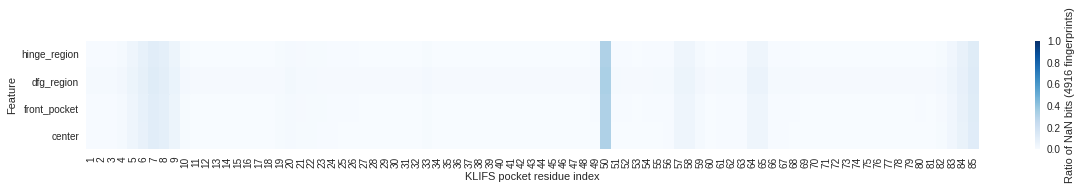

In [14]:
plt.figure(figsize=(20, 2))
sns.heatmap(
    features_nan.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Ratio of NaN bits ({n_fingerprints} fingerprints)"},
    vmin=0,
    vmax=1,
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

#### Barplot (for concrete values)

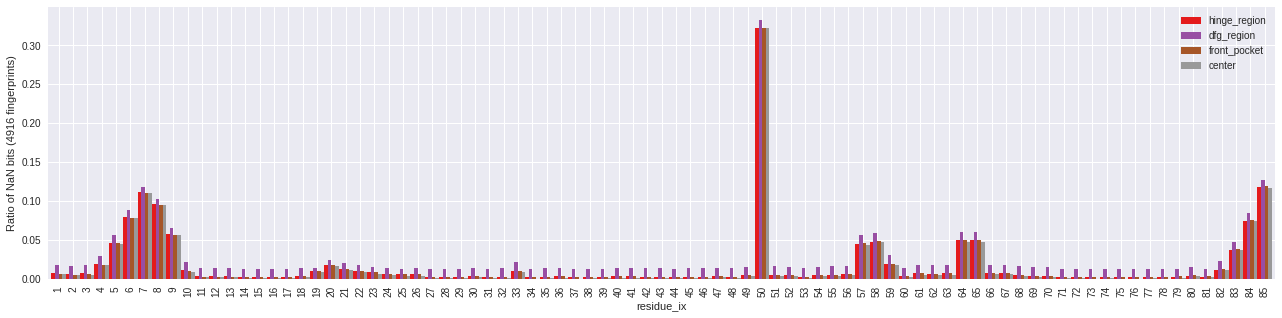

In [15]:
ax = features_nan.plot(kind="bar", figsize=(22, 5), width=1, colormap="Set1")
ax.set_ylabel(f"Ratio of NaN bits ({n_fingerprints} fingerprints)");

__Observations__

- As before for the physicochemical bits, the pattern here resembles the missing residue pattern.

### Missing moments bits

In [16]:
feature_group = "moments"
features_nan = nan_bit_ratio(fingerprint_generator, feature_group)
features_nan

,hinge_region,dfg_region,front_pocket,center
moment,,,,
1,0.001831,0.012408,0.001831,0.0
2,0.001831,0.012408,0.001831,0.0
3,0.001831,0.012408,0.001831,0.0


In [17]:
features = fingerprint_generator.moments_exploded()
structures_nan = features[features.isna().any(axis=1)]
print(
    f"Number of structures with at least one NaN moment: {len(structures_nan.index.get_level_values(0).unique())}"
)
structures_nan

Number of structures with at least one NaN moment: 68


hinge_region  dfg_region  front_pocket     center
structure_klifs_id moment                                                   
3411               1          12.792089         NaN     12.991387  11.873872
                   2           4.699955         NaN      4.232866   3.566473
                   3           2.862587         NaN      2.878989   1.570068
2542               1          12.814661         NaN     12.929758  12.332133
                   2           4.806795         NaN      4.490312   3.976784
...                                 ...         ...           ...        ...
8011               2                NaN         NaN           NaN   5.118995
                   3                NaN         NaN           NaN  -2.546785
7412               1          12.655181         NaN     12.835025  12.075967
                   2           5.058081         NaN      4.880447   3.926087
                   3           4.268742         NaN      4.795548   2.661538

[204 rows x 4 columns]

__Observations__

- About 70 structures show at least one empty moment, matching well with the number of structures for which one or more subpocket centers could not be determined and thus, no distance distribution and no corresponding moments could be inferred. Check out "Number of structures that will have no subpocket centers" in [this notebook](https://github.com/volkamerlab/kissim_app/blob/master/notebooks/dataset/explore_dataset.ipynb).

## Bit variability across fingerprints

In [18]:
def bit_variability(fingerprint_generator, feature_group):

    if feature_group == "physicochemical":
        features = fingerprint_generator.physicochemical_exploded()
        features = features.drop(["sco.vertex_angle", "exposure.ratio"], axis=1)
    elif feature_group == "distances":
        features = fingerprint_generator.distances_exploded()
    elif feature_group == "moments":
        features = fingerprint_generator.moments_exploded()
    else:
        raise KeyError("Feature group unknown.")

    features = features.unstack()
    features_std = features.std()
    features_std = features_std.unstack(0)

    return features_std

### Physicochemical bit variability

In [19]:
features_std = bit_variability(fingerprint_generator, "physicochemical")
features_std

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
residue_ix,,,,,,,,
1,0.623281,0.974217,0.835163,0.787536,0.150911,0.328830,0.500903,0.534480
2,0.615305,0.705538,0.697836,0.656792,0.195152,0.499866,0.438025,0.298472
3,0.313572,0.066923,0.065440,0.053468,0.049477,0.072724,0.480084,0.248837
4,0.241606,0.156596,0.140661,0.059302,0.060908,0.202922,0.661376,0.899142
5,0.648705,0.891112,0.793426,0.751853,0.127805,0.340368,0.216231,0.385835
...,...,...,...,...,...,...,...,...
81,0.078062,0.042787,0.178070,0.096367,0.028539,0.058757,0.418653,0.526566
82,0.288655,0.232967,0.142909,0.032052,0.222516,0.214905,0.332272,0.497942
83,0.092784,0.121767,0.154131,0.097407,0.025152,0.096982,0.448591,0.730896


In [20]:
features_std.describe()

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.486706,0.493945,0.409305,0.314802,0.207304,0.304290,0.374101,0.524591
std,0.190703,0.303938,0.257216,0.246533,0.142624,0.140649,0.196582,0.162386
min,0.028589,0.000000,0.000000,0.000000,0.000000,0.037720,0.028715,0.062061
25%,0.371585,0.258290,0.194326,0.096367,0.105520,0.202922,0.221303,0.443844
50%,0.504238,0.477580,0.427790,0.240190,0.190855,0.328830,0.418653,0.526992
75%,0.623281,0.688364,0.611417,0.522587,0.319735,0.434025,0.508362,0.617847
max,0.822254,1.249306,0.921675,0.817973,0.499881,0.500038,0.821023,0.899142


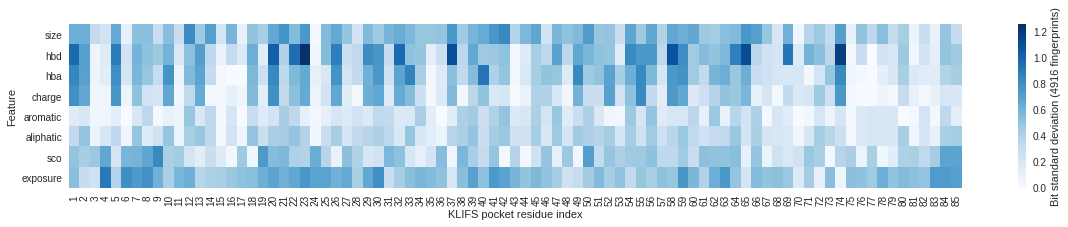

In [21]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

__Observations__

- Highest variability for HBD, lowest for aromatic and aliphatic
- Conserved regions show as expected rigid size/pharmacophoric feature variability (e.g. 4, 6, 17, 24, 70, 75, 81-83).

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

### Distances bit variability

In [22]:
features_std = bit_variability(fingerprint_generator, "distances")
features_std

,hinge_region,dfg_region,front_pocket,center
residue_ix,,,,
1,0.562041,0.935495,0.806641,0.630674
2,0.621707,1.135669,0.938285,0.793170
3,0.926225,1.091485,1.273146,1.046788
4,0.913214,1.419534,1.337515,1.099154
5,0.969400,1.695458,1.418179,1.266115
...,...,...,...,...
81,0.662080,0.773207,0.855669,0.690252
82,1.139588,1.071493,1.808655,0.748688
83,1.235430,1.740639,1.776043,0.945912


In [23]:
features_std.describe()

,hinge_region,dfg_region,front_pocket,center
count,85.000000,85.000000,85.000000,85.000000
mean,0.858948,1.048182,0.992820,0.902650
std,0.449887,0.381491,0.517099,0.409816
min,0.278171,0.496139,0.396415,0.433801
25%,0.511662,0.778255,0.612247,0.630674
50%,0.805312,0.998506,0.831709,0.793170
75%,1.034338,1.204701,1.134301,1.065182
max,2.301815,2.172183,2.910128,2.372279


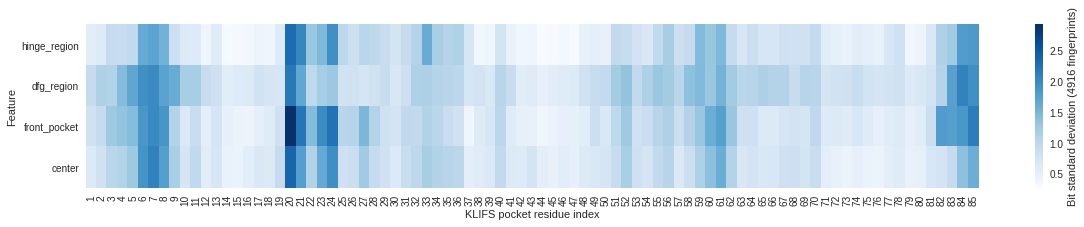

In [24]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

__Observations__

- Higher variability for 
  - residues 6-8 (part of the G-loop, known for loop flexibility) 
  - residues 20-24 (part of aC-helix, known for conformational changes)
  - residues 82-85 (part of DFG-loop and activation loop, know for conformational changes) 
  - residues 59-61 (part of aE-helix, ???)
  - residue 33 w.r.t. hinge region (???)

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

![](https://klifs.net/images/faq/pocket.png)

### Moments bit variability

In [25]:
features_std = bit_variability(fingerprint_generator, "moments")
features_std

,hinge_region,dfg_region,front_pocket,center
moment,,,,
1,0.197746,0.338054,0.238024,0.204183
2,0.166410,0.224358,0.297566,0.162519
3,0.545622,0.632413,0.567019,1.146154


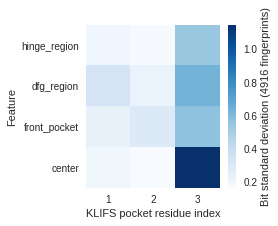

In [26]:
plt.figure(figsize=(3, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

## Top X bit with no/low/high variability

Get per-bit standard deviation for all feature types and check for bits with no/low/high variability.

In [27]:
bits_std = []
for feature_group in ["physicochemical", "distances", "moments"]:
    bits_std.append(bit_variability(fingerprint_generator, feature_group).unstack())
bits_std = pd.concat(bits_std)
bits_std.index.names = ["feature", "residue_ix"]
print(f"Number of bits with std: {len(bits_std)}")

Number of bits with std: 1032


### No variability

In [28]:
bits_std_no_variability = bits_std[bits_std == 0]
bits_std_no_variability.sort_index(level=1)

feature   residue_ix
aromatic  6             0.0
hba       16            0.0
aromatic  17            0.0
hba       17            0.0
aromatic  36            0.0
          70            0.0
charge    76            0.0
          77            0.0
hba       77            0.0
hbd       77            0.0
aromatic  80            0.0
dtype: float64

In [29]:
print(
    f"Number of bits with no effect because they are always (or almost always) the same: {len(bits_std_no_variability)}"
)

Number of bits with no effect because they are always (or almost always) the same: 11


### Low variability

In [30]:
bits_std_low_variability = bits_std[bits_std != 0].sort_values().head(30)
bits_std_low_variability.sort_index(level=1)

feature    residue_ix
aromatic   9             0.029339
charge     14            0.034929
aliphatic  15            0.037720
aromatic   15            0.024703
charge     15            0.031885
hba        15            0.031885
sco        16            0.040418
aromatic   24            0.037796
size       24            0.028589
charge     35            0.024706
hba        35            0.034929
charge     38            0.042753
sco        42            0.040489
charge     43            0.014270
sco        44            0.028715
charge     48            0.034929
aromatic   53            0.042770
           67            0.028589
           71            0.034921
hba        71            0.040340
sco        73            0.035176
aliphatic  75            0.042753
aromatic   75            0.020168
charge     75            0.028516
hbd        75            0.028516
hba        76            0.020168
charge     79            0.024711
aromatic   81            0.028539
charge     82            0

### High variability

In [31]:
bits_std_high_variability = bits_std[bits_std != 0].sort_values().tail(30)
bits_std_high_variability.sort_index(level=1)

feature       residue_ix
center        6             1.894502
dfg_region    6             1.936750
front_pocket  6             1.868566
center        7             2.096214
dfg_region    7             1.992055
front_pocket  7             2.002913
center        8             1.773808
dfg_region    8             1.736761
front_pocket  8             1.873380
center        20            2.372279
dfg_region    20            2.172183
front_pocket  20            2.910128
hinge_region  20            2.301815
center        21            1.769727
front_pocket  21            2.202807
hinge_region  21            2.041409
front_pocket  23            1.984044
center        24            1.951696
front_pocket  24            2.241438
hinge_region  24            1.937052
front_pocket  61            1.767627
              82            1.808655
dfg_region    83            1.740639
front_pocket  83            1.776043
dfg_region    84            2.086434
front_pocket  84            1.857866
hinge_region 